# Table of content:
1. Importing libraries

2. Splitting data (train test split)

3. Data cleaning

4. Model training

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Now lets import the Airline dataset.

In [2]:
df = pd.read_csv("D:\Projects Datasets/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


Lets create the target and feature dataframe.

In [3]:
target = pd.DataFrame(df['satisfaction'])
feature = df.drop('satisfaction', axis = 1)

In [4]:
target['satisfaction'] = target['satisfaction'].replace('satisfied','1')
target['satisfaction'] = target['satisfaction'].replace('dissatisfied','0')
target['satisfaction'] = target['satisfaction'].astype('int64')

# 2. Splitting data (train test split)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=25)

Now further splitting of feature dataframe is done on the basis of discrete, continuous and categorical data.

In [6]:
discrete_num = [col for col in X_train.columns if X_train[col].dtype !='O' and X_train[col].nunique() <= 10]
print(discrete_num)
print('No. of discrete variable: ', len((discrete_num)))

['Seat_comfort', 'Departure_Arrival_time_convenient', 'Food_and_drink', 'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']
No. of discrete variable:  14


In [7]:
conti_num = [col for col in X_train.columns if X_train[col].dtype !='O' and X_train[col].nunique() > 10]
print(conti_num)
print('No. of continuous variable: ', len(conti_num))

['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
No. of continuous variable:  4


In [8]:
cat_var = [col for col in X_train.columns if X_train[col].dtype =='O']
print(cat_var)
print('No. of categorical variable: ', len(cat_var))
ohe = ['Gender', 'Customer_Type', 'Type_of_Travel']
oe = ['Class']

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']
No. of categorical variable:  4


Okay so let's simply eliminate all of the duplicate datapoints from the training dataset.

In [9]:
X_train.drop_duplicates(inplace=True)

# 3. Data cleaning 
(a) Outliers are removed from the features that are identified in box plot.

In [10]:
for i in ['Onboard_service', 'Checkin_service']:
    outlier = X_train[X_train[i]<2].index
    X_train.drop(outlier, axis = 0, inplace = True)
    y_train.drop(outlier, axis = 0, inplace = True)

In [11]:
for i in conti_num:
    q1, q3 = np.percentile(X_train[i],[25,75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    higher = q3 + 1.5*iqr
    outlier = X_train[X_train[i]>higher].index.append(X_train[X_train[i]<lower].index)
    X_train.drop(outlier, axis = 0, inplace = True)
    y_train.drop(outlier, axis = 0, inplace = True)

(b) Creation of pipeines to fill missing values and categorical encoding according to datatypes.


In [12]:
discrete_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('scalar', StandardScaler())
])
conti_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scalar', StandardScaler())
])
cat_ohe_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
cat_oe_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('oe', OrdinalEncoder())
])

(c) Now, transformation is used to pass discrete and continuous variables in their respective pipelines and then fit and transform the processed data in feature variable.

In [13]:
transformer = ColumnTransformer(transformers=
    [
    ('tnf1', discrete_num_pipeline, discrete_num),
    ('tnf2', conti_num_pipeline, conti_num),
    ('tnf3', cat_oe_pipeline, oe),
    ('tnf4', cat_ohe_pipeline, ohe)
], remainder = 'passthrough')

(d) Lets transform our training and test dataset.

In [14]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# 4. Model training

In [15]:
def evaluate_model(true,predicted):
    acc = accuracy_score(true, predicted)
    matrix = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    return acc

Okay so now check the train and test accuracy of classification models.

In [16]:
models = {
    "Logistic_Regression":LogisticRegression(),
    "KNeighbors_Classifier":KNeighborsClassifier(),
    "RandomForest_Classifier":RandomForestClassifier(),
    "GradientBoosting_Classifier":GradientBoostingClassifier(),
    "XGB_Classifier":XGBClassifier()
}
model_dic = dict()

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = evaluate_model(y_train,y_train_pred)
    test_acc = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_dic[(list(models.keys())[i])] = test_acc
    
    print('Model performance on training set:')
    print("Train accuracy: {:.4f}".format(train_acc))
    # print("Confusion matrix: {}".format(matrix_train))
    # print("Classification report: {}".format(report_train))
    
    print("----------------------------------------")
    
    print('Model performance on test set:')
    print("Test accuracy: {:.4f}".format(test_acc))
    # print("Confusion matrix: {}".format(matrix_test))
    # print("Classification report: {}".format(report_test))
    # print("AUC score: {:.4f}".format(auc_score))
    
    print("="*40)
    print('\n')    


Logistic_Regression
Model performance on training set:
Train accuracy: 0.8440
----------------------------------------
Model performance on test set:
Test accuracy: 0.8296


KNeighbors_Classifier
Model performance on training set:
Train accuracy: 0.9474
----------------------------------------
Model performance on test set:
Test accuracy: 0.9038


RandomForest_Classifier
Model performance on training set:
Train accuracy: 1.0000
----------------------------------------
Model performance on test set:
Test accuracy: 0.9525


GradientBoosting_Classifier
Model performance on training set:
Train accuracy: 0.9317
----------------------------------------
Model performance on test set:
Test accuracy: 0.9233


XGB_Classifier
Model performance on training set:
Train accuracy: 0.9740
----------------------------------------
Model performance on test set:
Test accuracy: 0.9529




#  Model comparison
* Based on test accuracy

In [17]:
model_compare=pd.DataFrame(model_dic,index=['accuracy'])
model_compare

,Logistic_Regression,KNeighbors_Classifier,RandomForest_Classifier,GradientBoosting_Classifier,XGB_Classifier
accuracy,0.829612,0.903757,0.952533,0.923275,0.95288


<AxesSubplot:>

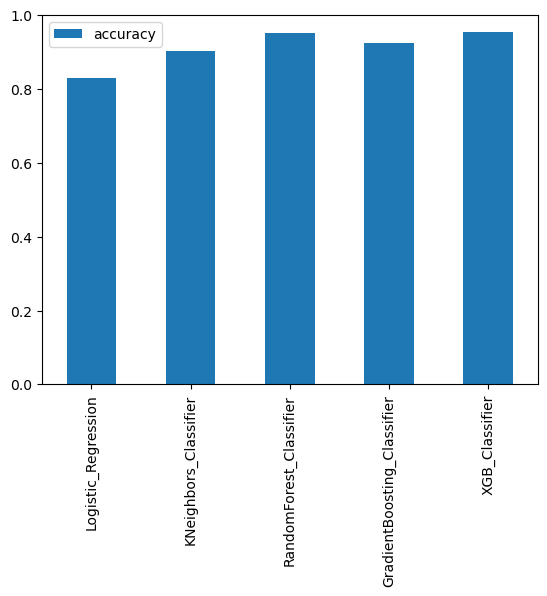

In [18]:
model_compare.T.plot(kind='bar')

Out of all models XGBClassifier and random forest are having best test accuracy of around 95% but random forest is overfitted so we go with XGBClassifier.

So now lets perform the hyperparameter tuning on XGBClassifier.

In [19]:
model = XGBClassifier()
param = {'learning_rate':[.1,.01,.05,.001],
         'n_estimators': [8,16,32,64,128,256]
        }
gs = GridSearchCV(model,param,cv=3)
gs.fit(X_train,y_train)
model.set_params(**gs.best_params_)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=256, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [20]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)
train_accuracy

0.9713163952716539

In [21]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, y_test)
test_accuracy

0.9537265167847243

Confusion matrix is plotted to measure the performance of XGBClassifier by identifying the total number of correct and incorrect predictons, as true negative and positive, false negative and positive

In [22]:
matrix = confusion_matrix(y_test,test_prediction)
matrix

array([[11201,   530],
       [  672, 13573]], dtype=int64)

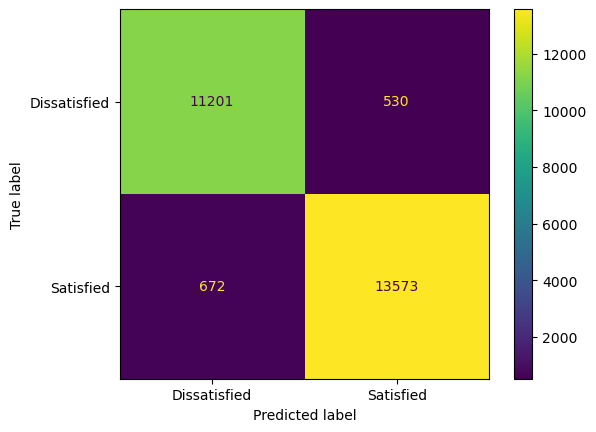

In [23]:
plot = ConfusionMatrixDisplay(matrix, display_labels=['Dissatisfied','Satisfied'] )
plot.plot()

Classification report is imported to measure performance of metric by observing precision, recall, f1-score and support values. Used to limit the values of FP, FN and both precision and recall.

In [24]:
report = classification_report(test_prediction, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11873
           1       0.95      0.96      0.96     14103

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



Probability of test data is predicted and threshold value is used to separated satisfied and dissatisfied customers. Generally 0.5 is the default threshold value.

Roc-auc curve is plotted between true positive rate and false positive rate.

In [25]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba

array([2.5654569e-02, 9.9867201e-01, 8.0174005e-01, ..., 4.1722227e-04,
       9.9949086e-01, 9.8166591e-01], dtype=float32)

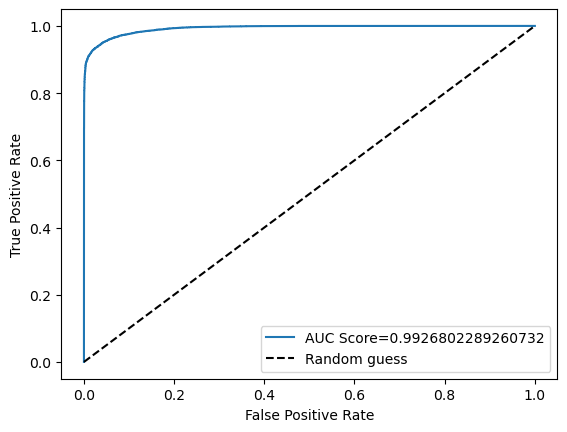

In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC Score="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()